# Course Project: Taxi Trip Duration Prediction


*****


![New York Taxi](https://i.imgur.com/e9GujSD.jpeg)

## Problem Statement:

#### The New York City Taxi Trip Duration Competition on Kaggle provides a dataset with over 1.45 million rows for training and 625k in the test set. Using the provided trip features, the duration of each trip in the test set is to be predicted. 

##### We begin by installing and importing the essential libraries and packages for analysis and modeling.

In [1]:
!pip install opendatasets --quiet;
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import seaborn as sns
import os
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
#Using Opendatasets and Kaggle API, we now import the dataset

od.download('https://www.kaggle.com/c/nyc-taxi-trip-duration/data')

Skipping, found downloaded files in "./nyc-taxi-trip-duration" (use force=True to force download)


In [4]:
#Checking the files in the dataset
os.listdir('nyc-taxi-trip-duration')

['train.zip', 'sample_submission.zip', 'test.zip']

In [103]:
#Import the training and test datasets into Pandas DataFrames
train_inputs = pd.read_csv('nyc-taxi-trip-duration/train.zip')
test_inputs  = pd.read_csv('nyc-taxi-trip-duration/test.zip')

In [6]:
#Here's how the training set looks
train_inputs.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [7]:
#Here's how the test set looks
test_inputs.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N
6,id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N
7,id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179,40.748760,-73.979309,40.761311,N


## Data Cleaning and Visualisation

#### In this step, we will check if some trends exist in the data, and get rid of unncessary data or anomalies in it which will then be worked upon by our ML Models.

In [87]:
#Lets get some preliminary information about the training set
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [88]:
#Let's now check the test dataset for the same
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


   From this, we can conclude that there are no null values in the training or the test datasets. The test dataset has 2 columns less than the training dataset:  
   **1. Trip Duration**  
   **2. Dropoff Datetime**  

The Trip Duration is obvious as it is the variable to be predicted. The Dropoff Datetime is implied, as with the pickup and dropoff datetimes, the trip duration can be easily calculated. Hence, we decide to drop the Dropoff Datetime column from the training set as well. The Trip Duration column should be saved separately as the target column after the data cleaning is complete

In [104]:
#Dropping Dropoff_datetime column as it is not present in the test dataset
#Dropping ID column from both train and test as it will not be useful in our analysis
train_inputs.drop(['id','dropoff_datetime'], axis =1, inplace=True)
test_inputs.drop(['id'], axis =1, inplace=True)

Now, the pickup datetime provides valuable information such as the year, month, day, and time of the pickup. When converted into a datetime object, we can also retrieve other information from it such as hour, what day of the week it is, what week of the year it is. For this, we write a function split_datetime

In [105]:
#Defining a split_datetime function
def split_datetime(df):
    df['date_time'] = pd.to_datetime(df['pickup_datetime'])
    df['year'] = df.date_time.dt.year
    df['month'] = df.date_time.dt.month
    df['day'] = df.date_time.dt.day
    df['WeekOfYear'] = df.date_time.dt.isocalendar().week
    df['hour'] = df.date_time.dt.hour
    df['dayname'] = df.date_time.dt.day_name()

In [106]:
#Applying the function on both the sets
split_datetime(train_inputs)
split_datetime(test_inputs)

In [107]:
#Dropping the original pickup_datetime column now that we have a new column that has the same information stored in a datetime object
train_inputs.drop(['pickup_datetime','date_time'], axis = 1, inplace = True)
test_inputs.drop(['pickup_datetime','date_time'], axis = 1, inplace = True)

The pickup and dropoff latitude and longitudes can be used to calculated the distance travelled, but for spherical distance, we use the haversine formula instead of the simple pythogorean calculation. You can read more about it [here.](https://en.wikipedia.org/wiki/Haversine_formula "Haversine Formula - Wikipedia")

For this, we define the follwing function:

In [108]:
import math
def haversine(long1, lat1, long2, lat2):
    long1, lat1, long2, lat2 = map(np.radians, [long1, lat1, long2, lat2])
    dlong = long2 - long1
    dlat  = lat2  - lat1
    hav   = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2.0)**2

    dist = 6367 * 2 * np.arcsin(np.sqrt(hav))
    return dist

def convert_coords(df):
    df['distance'] = haversine(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])

In [109]:
#Adding a distance feature in the train and test sets using the convert_coords function
convert_coords(train_inputs)
convert_coords(test_inputs)

In [110]:
#Checking all the different values of pickup hours
train_inputs.hour.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

*Thus, the datset contains pickup time of all hours round the clock. We know that traffic conditions vary throughout the day depending on the phase of the day, say evening and morning. For this, we add a timeofday feature to our data.*

In [111]:
def timeconv(df):

    conditions = [
    df['hour'] < 6,
    df['hour'] < 12,
    df['hour'] < 17,
    df['hour'] < 21,
    df['hour'] < 24 ]
    
    outputs = [
        'after_hours',
        'morning',
        'noon',
        'evening',
        'night'
    ]
    
    df['timeofday'] = np.select(conditions, outputs)

More information about transforming a dataframe based on conditions can be found [here.](https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column "Stackoverflow Answer")

In [112]:
#Using the timeconv function to carry out transformations
timeconv(train_inputs)
timeconv(test_inputs)

In [113]:
#Checking for the unique values in the month columns of train and test sets
print('Months in the Training Data: ', train_inputs.month.sort_values().unique())
print('Months in the Testing Data:  ', test_inputs.month.sort_values().unique())

Months in the Training Data:  [1 2 3 4 5 6]
Months in the Testing Data:   [1 2 3 4 5 6]


*Since both training and test datasets have the data from the same months, there is no point in time based splitting for a validation set.*

In [17]:
fig = px.histogram(data_frame=train_inputs.sample(1000),
                   x = 'hour',
                   color = 'vendor_id',
                   nbins = 24,
                   marginal = 'box',
                   title = 'Hourly Distribution of Pickups')
fig.update_layout(bargap = 0.1)
fig.show()

*The pickups peak in the evening around 7-8pm, while they're at the lowest in the early morning hours at 4-5am, and is almost equally distributed among the 2 vendors*

In [27]:
fig = px.histogram(data_frame=train_inputs.sample(1000),
                   x = 'passenger_count',
                   color = 'vendor_id',
                   marginal = 'box',
                   title = 'Hourly Distribution of Pickups')
fig.update_layout(bargap = 0.1)
fig.show()

*While most trips are with 1 passenger, trips with 0 passengers seem an anomaly, hence need to be dropped.*

In [114]:
#Confirming that there indeed are zero passenger rides
train_inputs.passenger_count.sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [115]:
#Dropping the rows with zero passengers
train_inputs.drop(train_inputs[train_inputs['passenger_count'] == 0].index, inplace = True)

In [30]:
fig = px.histogram(data_frame=train_inputs.sample(1000),
                   x = 'dayname',
                   color = 'vendor_id',
                   marginal = 'box',
                   nbins = 7,
                   title = 'Weekly Distribution of Pickups')
fig.update_layout(bargap = 0.1)
fig.show()

*We learn that the rides do not change much throughout the week except for a slight peak on Thursdays through Saturdays that wanes on Sundays and Mondays*

In [31]:
fig = px.scatter(train_inputs.sample(1000),
                      x = 'pickup_latitude',
                      y = 'pickup_longitude',
                      color = 'vendor_id',
                      title = 'Pickup Locations'
                      )
fig.update_traces(marker_size = 5)
fig.show()

In [32]:
fig = px.scatter(train_inputs.sample(1000),
                      x = 'dropoff_latitude',
                      y = 'dropoff_longitude',
                      color = 'vendor_id',
                      title = 'Dropoff Locations'
                      )
fig.update_traces(marker_size = 5)
fig.show()

*Here, we see some outliers. Despite them being a sample of the original dataset, we can assume that latitude values less than 40 and longitude values less than -74.2 are outliers. Hence, we must remove them*

In [101]:
#Defining a function for Dropping Pickup Coordinates Outliers
def coord_outliers(df):

  df.drop(df[df['pickup_latitude'] < 40.6].index, inplace=True)
  df.drop(df[df['pickup_latitude'] > 41].index, inplace=True)
  df.drop(df[df['pickup_longitude'] < -74.2].index, inplace=True)
  df.drop(df[df['pickup_longitude'] > -73.7].index, inplace=True)

  df.drop(df[df['dropoff_latitude'] < 40].index, inplace=True)
  df.drop(df[df['dropoff_latitude'] > 41].index, inplace=True)
  df.drop(df[df['dropoff_longitude'] < -74.5].index, inplace=True)
  df.drop(df[df['dropoff_longitude'] > -73.6].index, inplace=True)


In [116]:
coord_outliers(train_inputs)


In [117]:
train_inputs.loc[train_inputs['distance'] == 0].shape

(5761, 16)

*There are 5761 rows with distance of the trip as zero kilometers. This can be assumed as an anomaly and hence we would be better off without using this data*

In [118]:
#Dropping the rows with Zero distance
train_inputs.drop(train_inputs[train_inputs['distance'] == 0].index, inplace=True)

In [119]:
#Checking for zero distance rows again
train_inputs.loc[train_inputs['distance']==0].shape

(0, 16)

*Let us now check the maximum distance of any trip in the dataset*

In [120]:
train_inputs.distance.max()

62.29193517270548

*To know what trip durations are outliers, we need to consider the speed. Assuming a mean speed as low as 5km/s would mean it would take 12 hours to travel the longest distance in the training set. Hence, we can treat trip_durations longer than 12 hours as anomalies*

In [121]:
#Looking for trip_durations more than 12 hours, i.e. 12*60mins*60seconds = 43200 seconds
train_inputs.loc[train_inputs['trip_duration'] > 43200]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,WeekOfYear,hour,dayname,distance,timeofday
531,2,3,-74.008102,40.741489,-74.009956,40.714611,N,84594,2016,2,20,7,4,Saturday,2.990938,after_hours
1134,2,1,-73.990242,40.750919,-73.976280,40.750889,N,86149,2016,5,7,18,18,Saturday,1.175355,evening
1865,2,6,-73.954956,40.777649,-73.981033,40.743713,N,86352,2016,6,7,23,12,Tuesday,4.363363,noon
3442,2,1,-73.968590,40.799217,-73.979584,40.784714,N,86236,2016,2,13,6,0,Saturday,1.858248,after_hours
4172,2,1,-73.989090,40.736992,-73.972336,40.751511,N,85197,2016,3,18,11,11,Friday,2.143066,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455097,2,2,-73.969299,40.757301,-73.870277,40.709808,N,72504,2016,3,20,11,3,Sunday,9.868070,after_hours
1456458,2,3,-73.973282,40.760792,-73.988518,40.764210,N,86233,2016,2,8,6,19,Monday,1.337452,evening
1457207,2,1,-73.958061,40.800869,-73.964119,40.805515,N,85311,2016,6,8,23,16,Wednesday,0.725423,noon
1457752,2,6,-73.972069,40.794220,-73.961014,40.806728,N,86314,2016,2,2,5,11,Tuesday,1.672394,morning


*Thus, there are 1987 rows in the training set with trip durations more than 12 hours. We should drop all these entries assuming that they're outliers*

In [122]:
train_inputs.drop(train_inputs[train_inputs['trip_duration'] > 43200].index, inplace=True)
#Checking if the operation was successful
train_inputs.loc[train_inputs['trip_duration'] > 43200]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,WeekOfYear,hour,dayname,distance,timeofday


In [123]:
#Now assuming that a trip with duration less than 10 seconds is an error, we weed them out
train_inputs.loc[train_inputs['trip_duration'] < 10]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,WeekOfYear,hour,dayname,distance,timeofday
842,2,2,-73.782372,40.648766,-73.782372,40.648746,N,3,2016,5,21,20,12,Saturday,0.002120,noon
1107,2,3,-73.827660,40.716175,-73.822113,40.711452,N,2,2016,6,23,25,13,Thursday,0.702623,noon
1492,1,1,-73.793442,40.644814,-73.795242,40.644669,N,7,2016,1,13,2,20,Wednesday,0.152669,evening
1960,1,1,-73.964096,40.777172,-73.964088,40.777157,N,3,2016,3,30,13,8,Wednesday,0.001813,morning
2784,1,1,-73.790184,40.646637,-73.790184,40.646641,N,6,2016,6,10,23,6,Friday,0.000424,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456198,1,1,-73.974136,40.795700,-73.974144,40.795681,N,7,2016,6,2,22,23,Thursday,0.002215,night
1456442,2,1,-73.978844,40.761787,-73.978951,40.761833,N,7,2016,2,11,6,8,Thursday,0.010330,morning
1456613,1,1,-73.789665,40.646984,-73.789658,40.646976,N,9,2016,6,6,23,18,Monday,0.001064,evening
1457121,1,1,-73.913620,40.765675,-73.913620,40.765667,N,7,2016,4,3,13,7,Sunday,0.000848,morning


*There are 1304 such rows, and we decide we are better off without this data*

In [124]:
train_inputs.drop(train_inputs[train_inputs['trip_duration'] < 10 ].index, inplace=True)

*The Trip Duration column should be saved separately as the target column now that the data cleaning is complete*

In [125]:
targets = train_inputs['trip_duration'].copy()
targets


0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1448788, dtype: int64

In [126]:
train_inputs.drop(['trip_duration'], axis=1, inplace=True)
train_inputs

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,WeekOfYear,hour,dayname,distance,timeofday
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,2016,3,14,11,17,Monday,1.497580,evening
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,2016,6,12,23,0,Sunday,1.804374,after_hours
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2016,1,19,3,11,Tuesday,6.381090,morning
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,2016,4,6,14,19,Wednesday,1.484566,evening
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,2016,3,26,12,13,Saturday,1.187842,noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,N,2016,4,8,14,13,Friday,1.224311,noon
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,N,2016,1,10,1,7,Sunday,6.046037,morning
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,N,2016,4,22,16,6,Friday,7.819693,morning
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,N,2016,1,5,1,15,Tuesday,1.091878,noon


## Pre-Processing

#### Here, we will peform operations such as scaling, encoding, etc to make it easier for the model to learn from, and to make sure no individual feature has an upper hand solely due to the difference in mensuration units

In [32]:
train_inputs.columns.to_list()

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'year',
 'month',
 'day',
 'WeekOfYear',
 'hour',
 'dayname',
 'distance',
 'timeofday']

In [135]:
#Creating separate numeric and categorical column lists
numeric_cols =     [ 'passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','year',
                    'month', 'day', 'WeekOfYear', 'hour','distance']
categorical_cols = ['vendor_id', 'store_and_fwd_flag','timeofday','dayname']


In [136]:
#Checking for Null values in the numeric columns
train_inputs[numeric_cols].isna().sum()

passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
year                 0
month                0
day                  0
WeekOfYear           0
hour                 0
distance             0
dtype: int64

In [137]:
test_inputs[numeric_cols].isna().sum()

passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
year                 0
month                0
day                  0
WeekOfYear           0
hour                 0
distance             0
dtype: int64

*Now, neither the training set nor the test set have any null values. Hence, there is no immediate need to apply imputation as that will save us some memory. However, imputation is a good practice just in case a future, sample input may contain null values*

In [138]:
#Performing Imputation to get rid of any null values
#from sklearn.impute import SimpleImputer

#imputer = SimpleImputer().fit(train_inputs[numeric_cols])

#train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
#test_inputs[numeric_cols]  = imputer.transform(test_inputs[numeric_cols])

In [139]:
#Scaling the datasets using a MinMax Scaler to create a level playing field for all the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols]  = scaler.transform(test_inputs[numeric_cols])


In [140]:
#Encoding the categorical features using a One-Hot Encoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False).fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols]  = encoder.transform(test_inputs[categorical_cols])

In [141]:
#Rejoining the numerical and encoded columns to create the datasets for actual training
X      = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [40]:
#Using the train_test_split function to split the training dataset and create a validation dataset
from sklearn.model_selection import train_test_split

X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

## Training

#### After finally having cleaned, visualised and pre-processed data, we are ready to train models that will help us predict our target variable

### 1. Decision Tree 

In [37]:
#Fitting an untuned Decision Tree to the training set
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=69)

dtree.fit(X_train, train_targets)

DecisionTreeRegressor(random_state=69)

In [35]:
#We will use root mean squared error as our metric for our models' performances
from sklearn.metrics import mean_squared_error

In [38]:
tree_train_preds = dtree.predict(X_train)
tree_train_rmse  = mean_squared_error(train_targets, tree_train_preds, squared=False)
tree_val_preds   = dtree.predict(X_val)
tree_val_rmse    = mean_squared_error(val_targets, tree_val_preds, squared=False)
print('Train RMSE = {} ; Val RMSE = {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE = 0.0 ; Val RMSE = 515.6037370912559


*Thus, our training error is zero but the validation error is 515. This could mean we have overfit the model to the training data. Let us now look into how the tree looks*

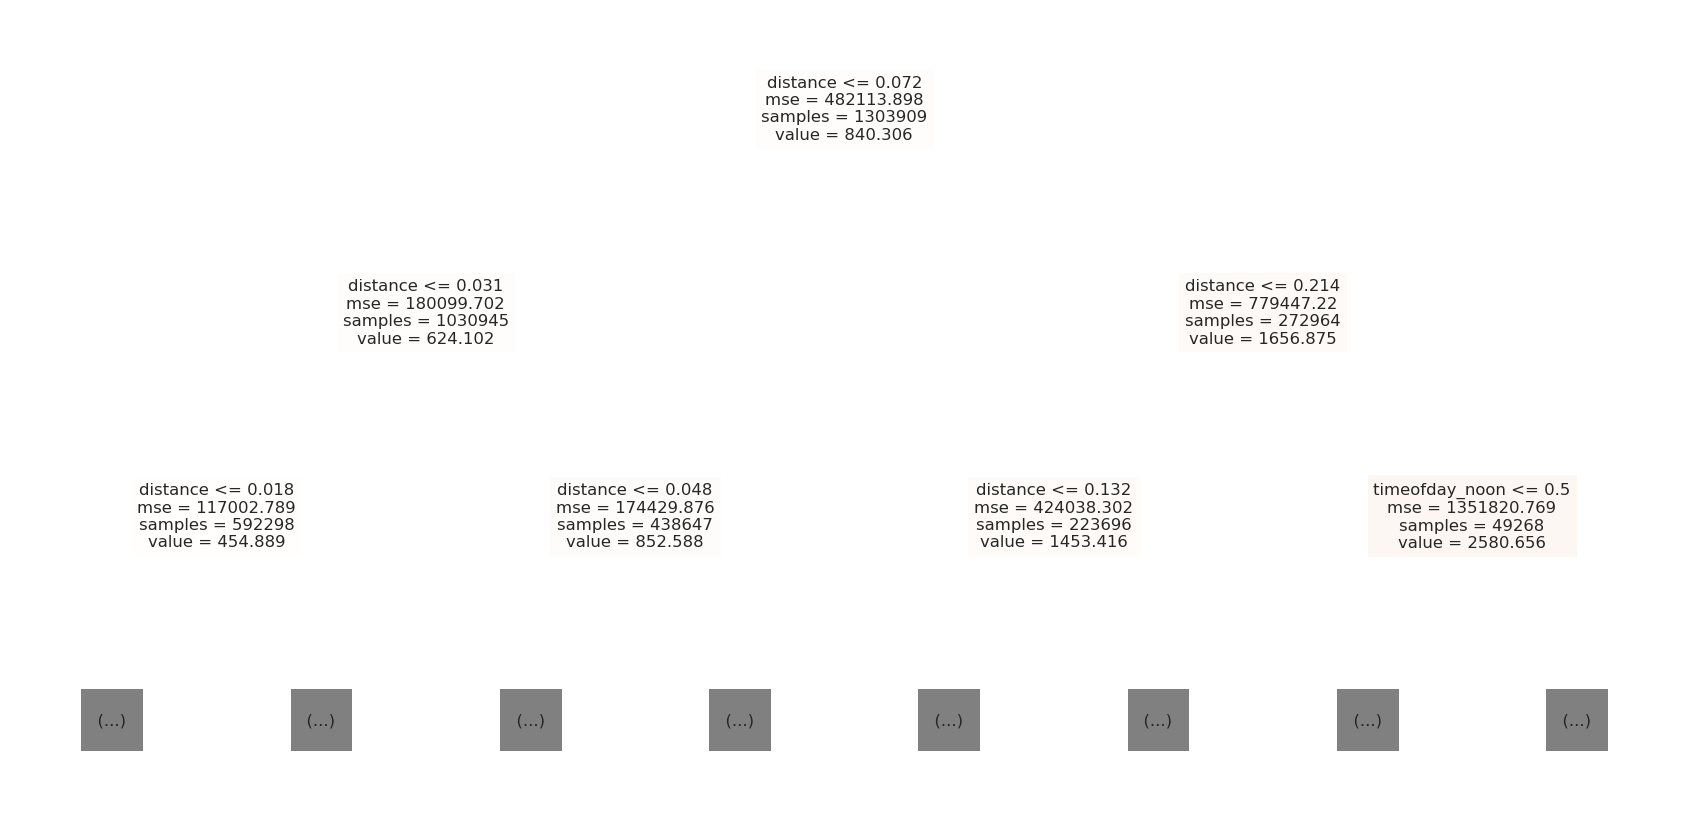

In [39]:
#Let us visualise this Decision Tree that we have built
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(30,15))
plot_tree(dtree, feature_names=X_train.columns, filled=True, max_depth=2);

In [40]:
#We can also obtain the tree in text form
tree_text = export_text(dtree, feature_names=list(X_train.columns), max_depth=10)
print(tree_text[:2000])

|--- distance <= 0.07
|   |--- distance <= 0.03
|   |   |--- distance <= 0.02
|   |   |   |--- distance <= 0.01
|   |   |   |   |--- dropoff_latitude <= 0.66
|   |   |   |   |   |--- hour <= 0.33
|   |   |   |   |   |   |--- distance <= 0.00
|   |   |   |   |   |   |   |--- dayname_Sunday <= 0.50
|   |   |   |   |   |   |   |   |--- dropoff_longitude <= 0.54
|   |   |   |   |   |   |   |   |   |--- day <= 0.78
|   |   |   |   |   |   |   |   |   |   |--- dropoff_longitude <= 0.54
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- dropoff_longitude >  0.54
|   |   |   |   |   |   |   |   |   |   |   |--- value: [718.00]
|   |   |   |   |   |   |   |   |   |--- day >  0.78
|   |   |   |   |   |   |   |   |   |   |--- dayname_Wednesday <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- dayname_Wednesday >  0.50
|   |   |   |   |   |   |   |

In [41]:
# Let us now check in what order does our Decision Tree allots the importance of the features
tree_imp = dtree.feature_importances_

tree_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_imp
}).sort_values('importance', ascending=False)

tree_importance_df

,feature,importance
10,distance,0.617292
9,hour,0.061703
3,dropoff_longitude,0.059768
4,dropoff_latitude,0.058036
1,pickup_longitude,0.051912
2,pickup_latitude,0.044705
7,day,0.020090
8,WeekOfYear,0.016597
19,timeofday_noon,0.010975
0,passenger_count,0.010042


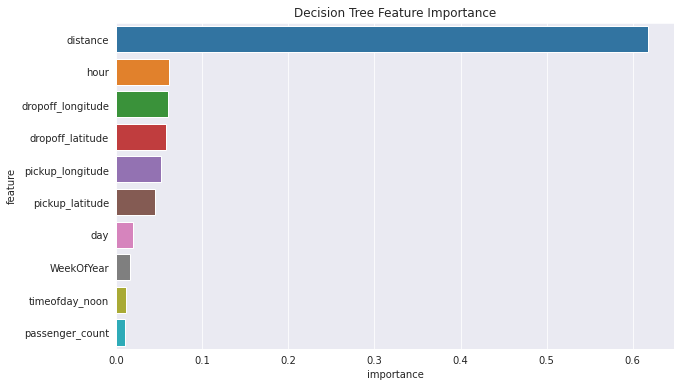

In [42]:
# We can also plot these feature importances for a simpler understanding
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

#### Hyperparameter Tuning

Since we could have overfit the model to the training data, we must now tune the model's hyperparameters to avoid this and improve the model

In [43]:
# Checking the Decision Tree's depth
depth = dtree.tree_.max_depth
depth

59

In [44]:
#Defining a function to check the optimum tree depth
def max_depth_rmse(md):
  dtree = DecisionTreeRegressor(max_depth=md, random_state=69)
  dtree.fit(X_train, train_targets)
  tree_train_preds = dtree.predict(X_train)
  tree_train_rmse  = mean_squared_error(train_targets, tree_train_preds, squared=False)
  tree_val_preds   = dtree.predict(X_val)
  tree_val_rmse    = mean_squared_error(val_targets, tree_val_preds, squared=False)
  return {'max_depth': md, 'Train RMSE': tree_train_rmse, 'Val RMSE': tree_val_rmse}

In [45]:
%%time
errors_df = pd.DataFrame([max_depth_rmse(md) for md in range(1,depth,5)])

CPU times: user 5min 30s, sys: 1.3 s, total: 5min 32s
Wall time: 5min 32s


In [46]:
#Here we have a dataframe of all the values of all the values of max_depth and the corresponding root mean squared error
errors_df

,max_depth,Train RMSE,Val RMSE
0,1,552.782785,548.410508
1,6,429.516154,425.991133
2,11,381.817395,408.417060
3,16,304.598358,419.058795
4,21,213.554434,466.424577
5,26,125.064972,504.420000
6,31,60.771779,490.889615
7,36,24.367934,506.454680
8,41,8.350295,506.873559
9,46,2.966412,516.396026


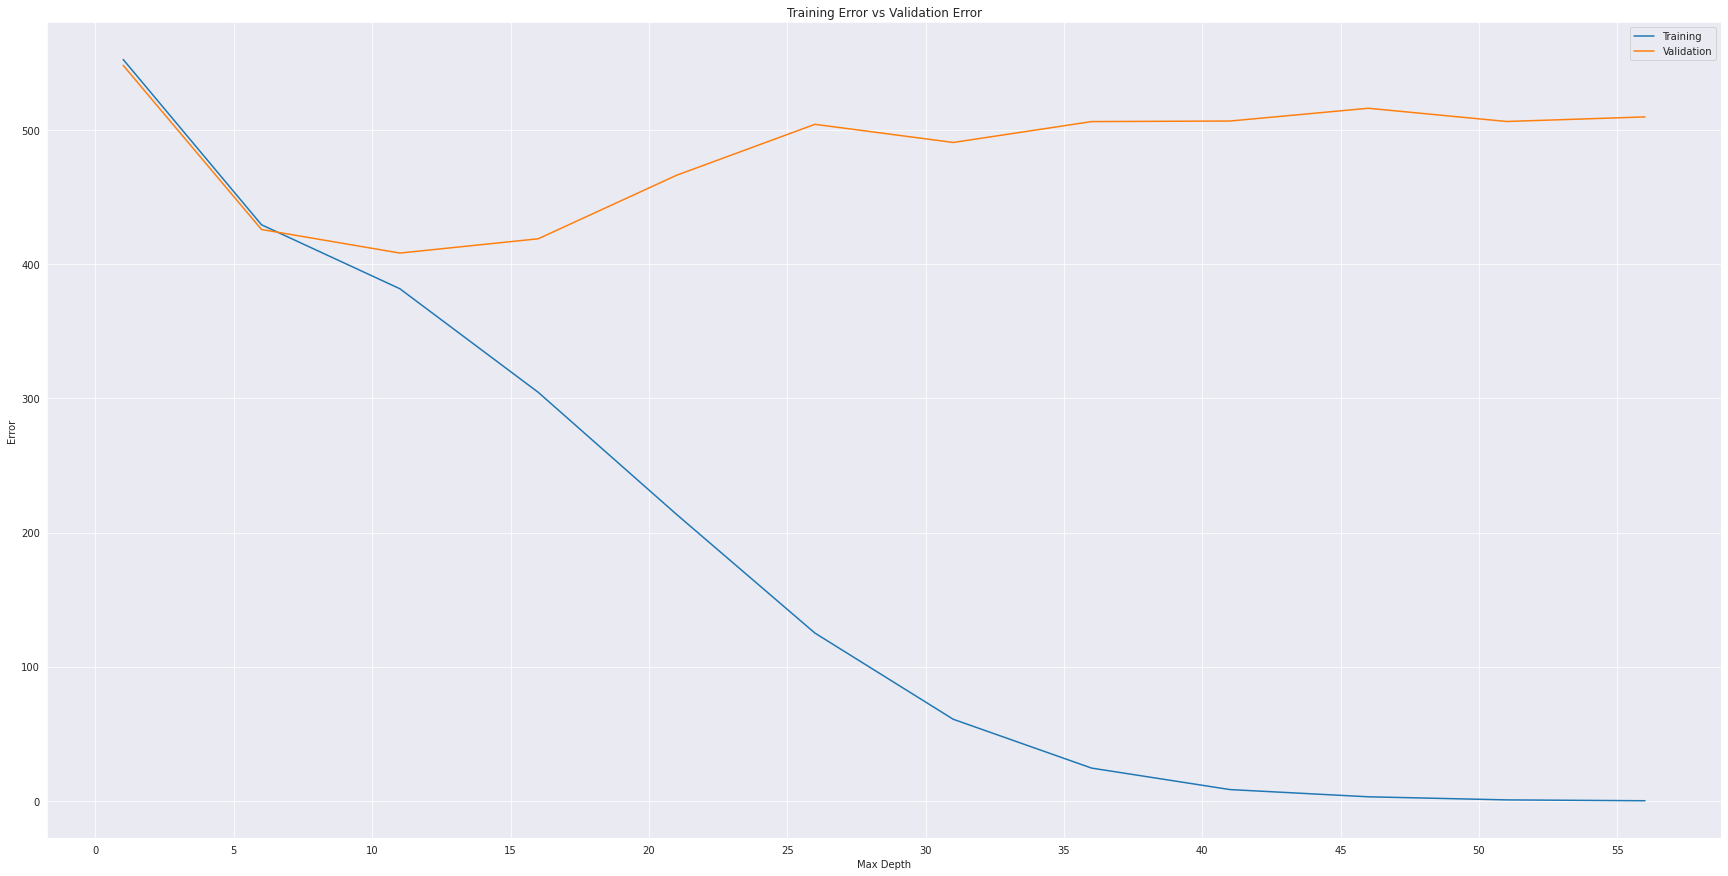

In [47]:
plt.figure(figsize=(30,15))
plt.plot(errors_df['max_depth'], errors_df['Train RMSE']);
plt.plot(errors_df['max_depth'], errors_df['Val RMSE']);
plt.xticks(range(0,59,5));
plt.title('Training Error vs Validation Error');
plt.xlabel('Max Depth');
plt.ylabel('Error');
plt.legend(['Training','Validation']);

In [48]:
#Retrieving the max depth with the least Validation error
errors_df.max_depth[errors_df['Val RMSE'].idxmin()]

11

*Thus, the Validation error is minimum at a max_depth of 11. We have thus tuned our first hyperparameter*

In [49]:
#Fitting a model with the newly tuned max depth parameter and checking for Validation error
dtree = DecisionTreeRegressor(max_depth=11, random_state=69).fit(X_train, train_targets)
tree_val_preds  = dtree.predict(X_val)
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)
print('The Validation RMSE is ', tree_val_rmse)

The Validation RMSE is  408.41705973816306


*Now that one hyperparameter is tuned, we will move on to the next one: max leaf nodes*

In [50]:
#Trying with a random number : 128
dtree = DecisionTreeRegressor(max_depth=11, max_leaf_nodes= 128, random_state=69).fit(X_train, train_targets)

tree_val_preds  = dtree.predict(X_val)
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)
tree_val_rmse

411.6593997752085

In [51]:
#Checking the result of reduction of leaf nodes on error
dtree = DecisionTreeRegressor(max_depth=11, max_leaf_nodes= 64, random_state=69).fit(X_train, train_targets)

tree_val_preds  = dtree.predict(X_val)
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)
tree_val_rmse

418.8422545719711

In [52]:
dtree = DecisionTreeRegressor(max_depth=11, max_leaf_nodes= 256, random_state=69).fit(X_train, train_targets)

tree_val_preds  = dtree.predict(X_val)
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)
tree_val_rmse

405.24017565529095

In [53]:
dtree = DecisionTreeRegressor(max_depth=11, max_leaf_nodes=1028, random_state=69).fit(X_train, train_targets)

tree_val_preds  = dtree.predict(X_val)
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)
tree_val_rmse

402.8800273235887

*We thus obtain the optimum max_leaf_nodes to be 1028. We will now build a final decision tree with these tuned hyperparameters*

In [54]:
dtree = DecisionTreeRegressor(max_depth=11, max_leaf_nodes=1028, random_state=69).fit(X_train, train_targets)

tree_train_preds  = dtree.predict(X_train)
tree_train_rmse = mean_squared_error(train_targets, tree_train_preds, squared=False)

tree_val_preds  = dtree.predict(X_val)
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)

print('The Training Error is {} and the Validation Error is {}'.format(tree_train_rmse, tree_val_rmse))

The Training Error is 383.12399301152556 and the Validation Error is 402.8800273235887


### 2. Random Forest

*After having trained a decision tree, we will now try to train a Random Forest on our dataset and see if it gives better results*

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs = -1, random_state=69)

rf.fit(X_train, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=69)

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
rf_train_preds  = rf.predict(X_train)
rf_train_rmse  = mean_squared_error(train_targets, rf_train_preds, squared=False)
rf_val_preds   = rf.predict(X_val)
rf_val_rmse    = mean_squared_error(val_targets, rf_val_preds, squared=False)
print('Train RMSE = {} ; Val RMSE = {}'.format(rf_train_rmse, rf_val_rmse))

Train RMSE = 136.27752737197153 ; Val RMSE = 425.8769993810567


*Let us now check a couple of individual trees from our model*

In [58]:
from sklearn.tree import plot_tree

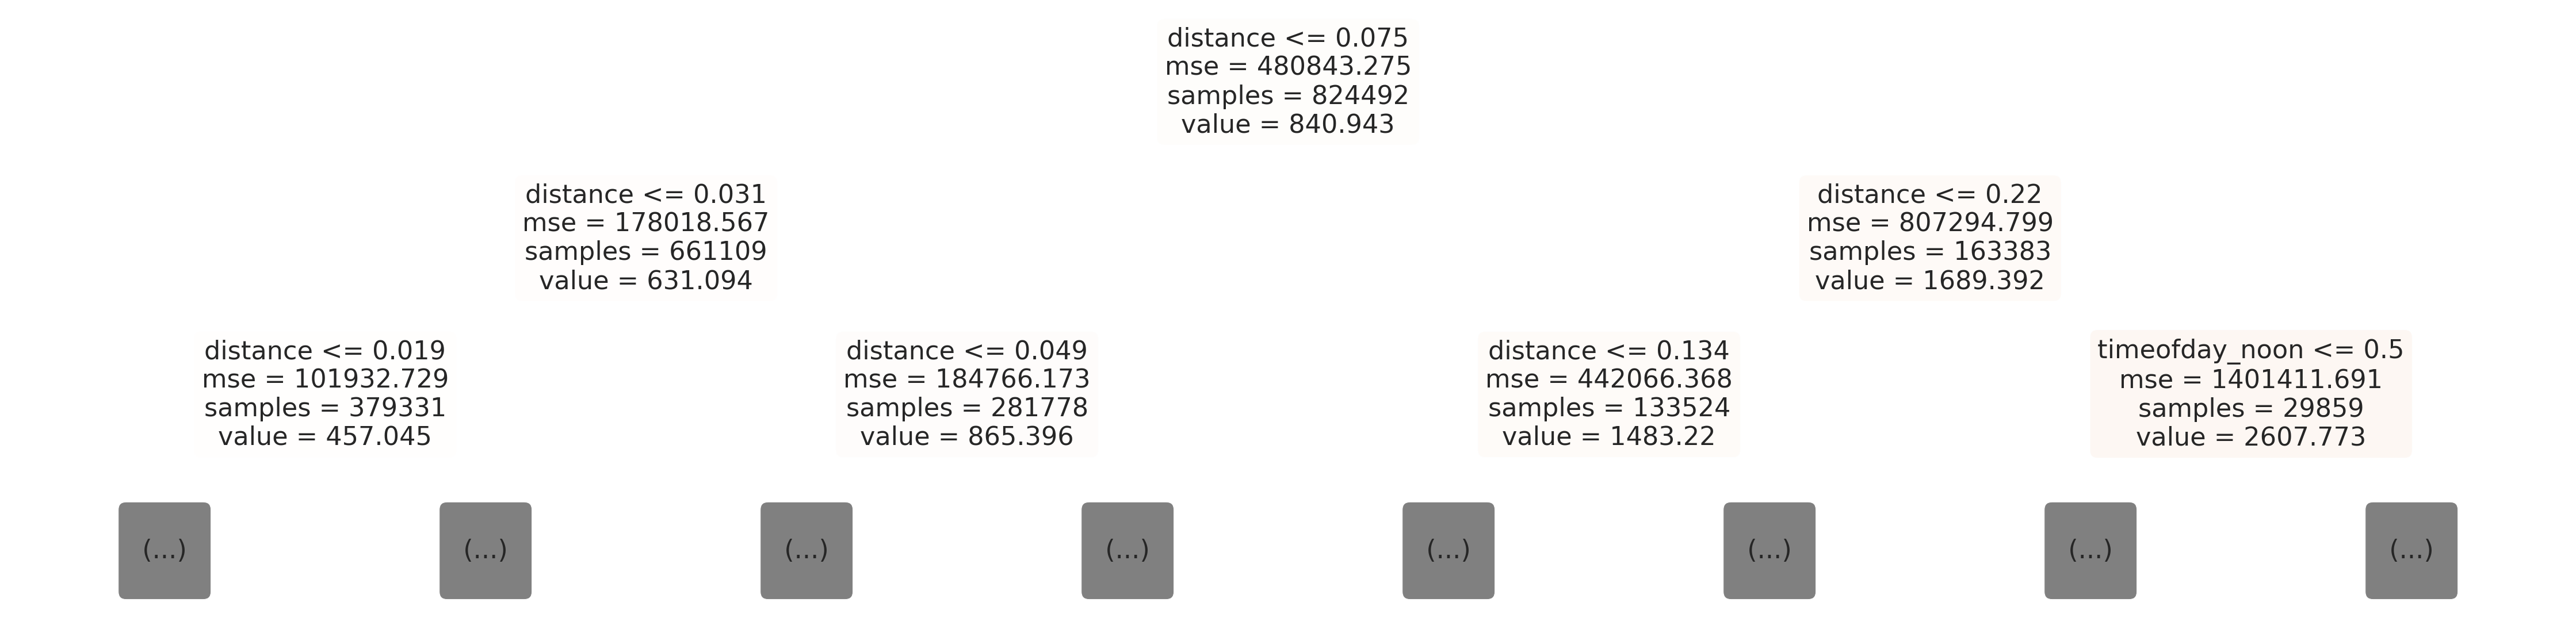

In [59]:
plt.figure(figsize=(80,20))
plot_tree(rf.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True);

In [60]:
#Checking the total numer of estimators in our model
len(rf.estimators_)

100

In [61]:
#Checking the Feature Importances
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending = False)
importance_df.head(10)

,feature,importance
10,distance,0.613738
4,dropoff_latitude,0.062192
9,hour,0.058291
3,dropoff_longitude,0.057401
1,pickup_longitude,0.054231
2,pickup_latitude,0.045900
7,day,0.020004
8,WeekOfYear,0.017135
6,month,0.009695
19,timeofday_noon,0.009614


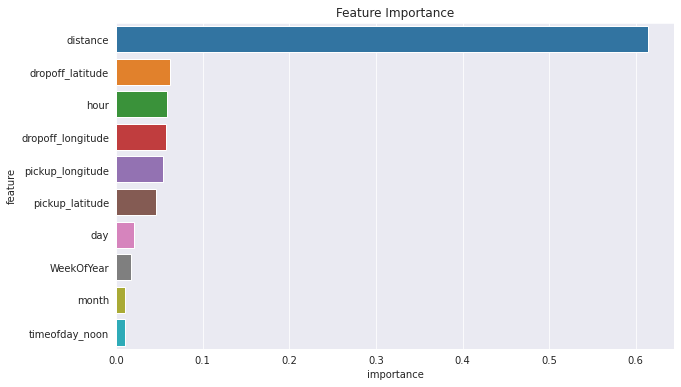

In [62]:
plt.title('Feature Importance');
sns.barplot(data=importance_df.head(10), y='feature', x='importance');

#### Hyperparameter Tuning

In [39]:
#Tuning the n_estimators parameter
rf = RandomForestRegressor(n_jobs=-1, n_estimators=30, random_state=69).fit(X_train, train_targets)

In [40]:
rf_train_preds = rf.predict(X_train)
rf_train_rmse  = mean_squared_error(train_targets, rf_train_preds, squared=False)
rf_val_preds   = rf.predict(X_val)
rf_val_rmse    = mean_squared_error(val_targets, rf_val_preds, squared=False)
print('Train RMSE = {} ; Val RMSE = {}'.format(rf_train_rmse, rf_val_rmse))

Train RMSE = 143.12029023096648 ; Val RMSE = 386.78037978567477


In [80]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, random_state=69).fit(X_train, train_targets)

In [81]:
rf_train_preds = rf.predict(X_train)
rf_train_rmse  = mean_squared_error(train_targets, rf_train_preds, squared=False)
rf_val_preds   = rf.predict(X_val)
rf_val_rmse    = mean_squared_error(val_targets, rf_val_preds, squared=False)
print('Train RMSE = {} ; Val RMSE = {}'.format(rf_train_rmse, rf_val_rmse))

Train RMSE = 139.81778322377352 ; Val RMSE = 383.9512687261121


In [82]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=25, random_state=69).fit(X_train, train_targets)

In [83]:
rf_train_preds  = rf.predict(X_train)
rf_train_rmse  = mean_squared_error(train_targets, rf_train_preds, squared=False)
rf_val_preds   = rf.predict(X_val)
rf_val_rmse    = mean_squared_error(val_targets, rf_val_preds, squared=False)
print('Train RMSE = {} ; Val RMSE = {}'.format(rf_train_rmse, rf_val_rmse))

Train RMSE = 144.7308692870328 ; Val RMSE = 387.96322498595345


In [43]:
def model_params(**params):
    rf          = RandomForestRegressor(random_state=69, n_jobs=-1, n_estimators=50, **params).fit(X_train, train_targets);
    train_preds = rf.predict(X_train)
    train_rmse  = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds   = rf.predict(X_val)
    val_rmse    = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

In [44]:
model_params(max_depth=5)

(434.1818363881471, 445.08038312086546)

In [45]:
model_params(max_depth=10)

(383.58789402959354, 410.77740481092945)

In [46]:
model_params(max_depth=20)

(230.31399436222037, 387.6863367669352)

In [74]:
model_params(max_depth=50)

(139.8552013373894, 383.9552841960312)

In [52]:
model_params(max_depth=40)

(139.8901205041362, 383.4166922577906)

In [47]:
model_params(min_samples_split=10)

(214.4696182314677, 380.3124264845752)

In [51]:
model_params(min_samples_split=20)

(256.8458215732958, 379.0531926578003)

In [54]:
model_params(min_samples_split=30)

(279.4328983480502, 379.0322287065725)

In [65]:
model_params(max_features = 6)

(138.06542182055253, 375.97535422141164)

In [56]:
model_params(max_features = 'sqrt')

(138.67849187124236, 378.570212241687)

In [57]:
model_params(max_features = 'log2')

(139.8525331849669, 381.43335228506436)

In [69]:
model_params(max_features = 8)

(137.90125336333153, 375.6177490254156)

In [70]:
model_params(min_samples_leaf = 5)

(276.53383790278895, 374.9097708602122)

In [73]:
model_params(min_samples_leaf = 4)

(262.2146397799942, 375.1722695354177)

*Thus building a final model*

In [75]:
rf = RandomForestRegressor(n_jobs = -1,
                                 n_estimators = 50,
                                 max_depth = 40,
                                 max_features = 8,
                                 min_samples_split = 30,
                                 min_samples_leaf = 5,
                                 random_state = 69)

In [76]:
%%time
rf.fit(X_train, train_targets)

CPU times: user 7min 45s, sys: 335 ms, total: 7min 45s
Wall time: 2min 1s


RandomForestRegressor(max_depth=40, max_features=8, min_samples_leaf=5,
                      min_samples_split=30, n_estimators=50, n_jobs=-1,
                      random_state=69)

In [77]:
train_preds = rf.predict(X_train)
train_rmse  = mean_squared_error(train_targets, train_preds, squared=False)
val_preds   = rf.predict(X_val)
val_rmse    = mean_squared_error(val_targets, val_preds, squared=False)
print('The Training error is {} and the Validation error is {}'.format(train_rmse, val_rmse))

The Training error is 319.1184572104079 and the Validation error is 376.4780472572456


### 3. Gradient Boosted Decision Trees

In [41]:
from xgboost import XGBRegressor

In [42]:
?XGBRegressor

Init signature: XGBRegressor(*, objective='reg:squarederror', **kwargs)
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify which tree method to use.  Default to auto.  If this parameter
        is set to default, XGBoost will choose the most conservative option
        available.  It's recommended

In [43]:
gbdt = XGBRegressor(random_state=69, n_jobs=-1)

In [44]:
%%time
gbdt.fit(X_train, train_targets)

CPU times: user 9min 20s, sys: 1.11 s, total: 9min 21s
Wall time: 2min 25s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=69,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
train_preds = gbdt.predict(X_train)
train_rmse  = mean_squared_error(train_targets, train_preds, squared=False)
val_preds   = gbdt.predict(X_val)
val_rmse    = mean_squared_error(val_targets, val_preds, squared=False)
print('The Training error is {} and the Validation error is {}'.format(train_rmse, val_rmse))

The Training error is 331.7435160428136 and the Validation error is 427.91963557759846


In [48]:
import graphviz
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =(30,30)

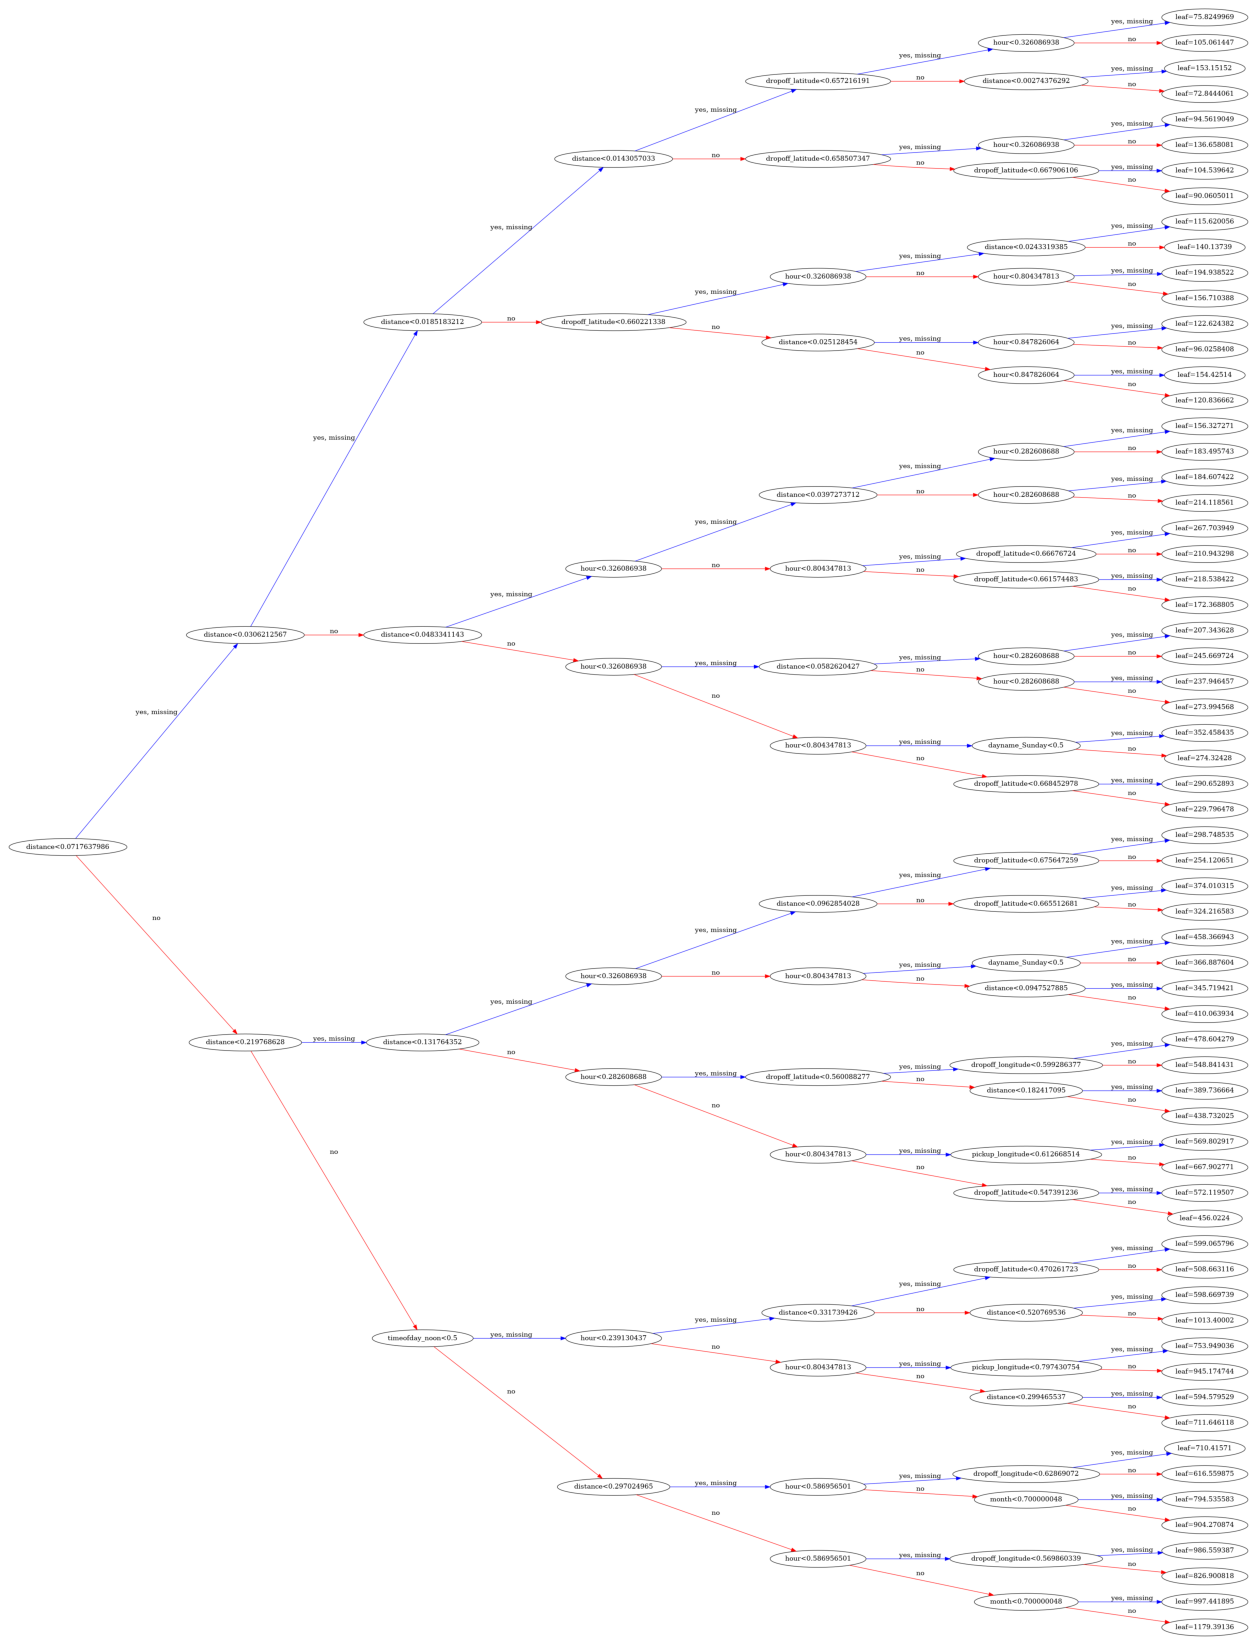

In [49]:
plot_tree(gbdt, rankdir='LR');

In [50]:
trees =  gbdt.get_booster().get_dump()
len(trees)

100

In [51]:
print(trees[0])

0:[distance<0.0717637986] yes=1,no=2,missing=1
	1:[distance<0.0306212567] yes=3,no=4,missing=3
		3:[distance<0.0185183212] yes=7,no=8,missing=7
			7:[distance<0.0143057033] yes=15,no=16,missing=15
				15:[dropoff_latitude<0.657216191] yes=31,no=32,missing=31
					31:[hour<0.326086938] yes=63,no=64,missing=63
						63:leaf=75.8249969
						64:leaf=105.061447
					32:[distance<0.00274376292] yes=65,no=66,missing=65
						65:leaf=153.15152
						66:leaf=72.8444061
				16:[dropoff_latitude<0.658507347] yes=33,no=34,missing=33
					33:[hour<0.326086938] yes=67,no=68,missing=67
						67:leaf=94.5619049
						68:leaf=136.658081
					34:[dropoff_latitude<0.667906106] yes=69,no=70,missing=69
						69:leaf=104.539642
						70:leaf=90.0605011
			8:[dropoff_latitude<0.660221338] yes=17,no=18,missing=17
				17:[hour<0.326086938] yes=35,no=36,missing=35
					35:[distance<0.0243319385] yes=71,no=72,missing=71
						71:leaf=115.620056
						72:leaf=140.13739
					36:[hour<0.804347813] yes=73,no=74,mis

In [52]:
importance_df = pd.DataFrame({
    'feature' : X_train.columns,
    'importance': gbdt.feature_importances_
}).sort_values('importance', ascending=False)

In [53]:
importance_df.head(10)

,feature,importance
10,distance,0.502919
19,timeofday_noon,0.061119
23,dayname_Sunday,0.059451
9,hour,0.052640
6,month,0.031449
17,timeofday_morning,0.031315
22,dayname_Saturday,0.029583
21,dayname_Monday,0.027035
16,timeofday_evening,0.023405
4,dropoff_latitude,0.020207


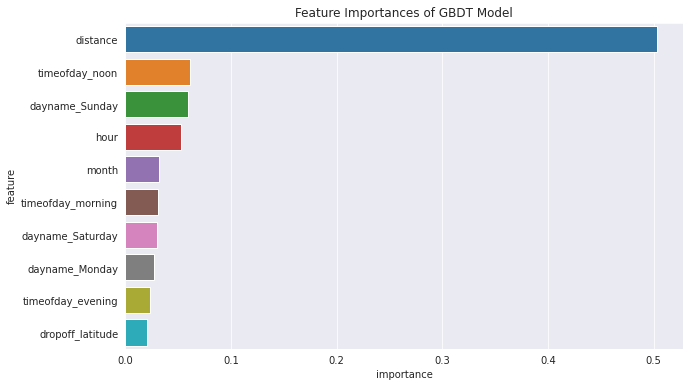

In [54]:
plt.figure(figsize= (10,6))
plt.title('Feature Importances of GBDT Model')
sns.barplot(data=importance_df.head(10), x = 'importance', y='feature');

In [55]:
def test_params(**params):
    gbdt = XGBRegressor(n_jobs=-1, random_state=69, **params)
    gbdt.fit(X_train, train_targets)
    train_rmse = mean_squared_error(train_targets, gbdt.predict(X_train), squared=False)
    val_rmse   = mean_squared_error(val_targets, gbdt.predict(X_val), squared=False)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [56]:
test_params(n_estimators=10)

Train RMSE: 394.5180784453381, Validation RMSE: 458.2128394596253


In [57]:
test_params(n_estimators=50)

Train RMSE: 353.33638465532067, Validation RMSE: 432.6740100157384


In [58]:
test_params(n_estimators=150)

Train RMSE: 318.4522260060183, Validation RMSE: 426.08160437162894


In [59]:
test_params(n_estimators=250)

Train RMSE: 302.30886114718373, Validation RMSE: 424.22634040146613


In [64]:
test_params(n_estimators=250, max_depth = 16)

Train RMSE: 89.7913140255572, Validation RMSE: 424.04844873415885


In [62]:
test_params(n_estimators=250, max_depth = 6)

Train RMSE: 302.30886114718373, Validation RMSE: 424.22634040146613


In [63]:
test_params(n_estimators=250, max_depth = 8)

Train RMSE: 261.269645072961, Validation RMSE: 421.17433375094515


In [65]:
model_gbdt = XGBRegressor(n_jobs = -1,
                          n_estimators = 250,
                          max_depth = 8,
                          learning_rate = 0.32)

In [66]:
%%time
model_gbdt.fit(X_train, train_targets)

CPU times: user 31min 4s, sys: 867 ms, total: 31min 5s
Wall time: 7min 56s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.32, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
train_preds = model_gbdt.predict(X_train)
train_rmse  = mean_squared_error(train_targets, train_preds, squared=False)
val_preds   = model_gbdt.predict(X_val)
val_rmse    = mean_squared_error(val_targets, val_preds, squared=False)
print('The Training error is {} and the Validation error is {}'.format(train_rmse, val_rmse))

The Training error is 259.8988671235536 and the Validation error is 424.4601899250216


##### We thus have observed after training and fine-tuning three models that the Random Forest gives the least errors. So we will use Random Forest to derive our submission set from the test inputs

In [143]:
test_targets = rf.predict(X_test)

In [128]:
submission = pd.read_csv('nyc-taxi-trip-duration/sample_submission.zip')


In [129]:
submission

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


In [144]:
submission['trip_duration'] = test_targets

In [145]:
submission

,id,trip_duration
0,id3004672,791.432949
1,id3505355,647.367534
2,id1217141,448.385325
3,id2150126,1231.302246
4,id1598245,404.993457
...,...,...
625129,id3008929,301.681036
625130,id3700764,1130.765604
625131,id2568735,1543.323846
625132,id1384355,1932.040533


In [146]:
#Writing the test predictions to a csv file
submission.to_csv('submission.csv', index=None)

In [147]:
from IPython.display import FileLink

In [148]:
#Obtaining a downloadable link
FileLink('submission.csv')

/kaggle/working/submission.csv

***Here's how the submission ranks on the Leaderboard***
https://www.kaggle.com/c/nyc-taxi-trip-duration/leaderboard#score
![](https://i.imgur.com/UEWZMJU.png)

Let's use our model to estimate the trip duration of a sample input

In [79]:
def predict_input(model, new_input):
    input_df = pd.DataFrame([new_input])
    split_datetime(input_df)
    input_df.drop(['pickup_datetime','date_time'], axis = 1, inplace = True)
    convert_coords(input_df)
    timeconv(input_df)
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred

In [80]:
sample_input = {
    'id' : 'id2875421',
    'vendor_id' : 2,
    'pickup_datetime' : '2016-05-14 19:24:55',
    'dropoff_datetime' : '2016-05-14 17:32:30',
    'passenger_count': 3,
    'pickup_longitude' : -73.988115,
    'pickup_latitude' : 40.732014,
    'dropoff_longitude' : -73.990143,
    'dropoff_latitude' : 40.75652,
    'store_and_fwd_flag' : 'N'
}


In [81]:
predict_input(rf, sample_input)

1117.2366465324026

**Final Step: Saving Our Model**

In [82]:
import joblib

In [150]:
taxi_preds = {
    'model': rf,
    'scaler': scaler,
    'encoder': encoder,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [151]:
joblib.dump(taxi_preds, 'taxi_preds.joblib')

['taxi_preds.joblib']

## Summary

We have thus completed our analysis and training of ML models. In this journey we:
1. Found that the dataset needs cleaning as there were quite a few anomalies
2. Performed various data cleaning operations
3. Engineered new features such as Distance and TimeofDay, i.e Phase (Morning/Evening)
4. We built three models:
4. 1. Decision Tree
4. 2. Random Forest
4. 3. Gradient Boosted Decision Trees
5. We tuned the hyperparameters of each of these models
6. We realised that Random Forest gave the least error on our data with the Validation RMSE being 376.4.Hence, we used Random Forest to make predictions on the test data.

## References

1. https://www.quora.com/What-is-the-longest-distance-you-have-had-to-drive-within-New-York-City-How-long-did-it-take-you
2. https://stackoverflow.com/questions/27791651/pandas-boolean-any-all
3. https://boundingbox.klokantech.com/
4. https://www.markdownguide.org/basic-syntax/
5. https://en.wikipedia.org/wiki/Haversine_formula
6. https://www.kaggle.com/headsortails/nyc-taxi-eda-update-the-fast-the-curious
7. https://www.kaggle.com/taimurzahid/taxi-trip-duration-prediction-anomaly-detection